In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

In [164]:
# Assuming the dataset is in a CSV file named 'reviews.csv'
df = pd.read_csv('STD Cases.csv')

In [165]:
df.shape

(42680, 10)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42680 entries, 0 to 42679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Disease        42530 non-null  object 
 1   Disease Code   42530 non-null  float64
 2   State          42530 non-null  object 
 3   Year           42530 non-null  float64
 4   Gender         42530 non-null  object 
 5   Age            42530 non-null  object 
 6   Age Code       42530 non-null  object 
 7   STD Cases      42530 non-null  float64
 8   Population     35483 non-null  float64
 9   Rate per 100K  35483 non-null  float64
dtypes: float64(5), object(5)
memory usage: 3.3+ MB


In [167]:
df.columns

Index(['Disease', 'Disease Code', 'State', 'Year', 'Gender', 'Age', 'Age Code',
       'STD Cases', 'Population', 'Rate per 100K'],
      dtype='object')

In [168]:
df.isna().sum()

Disease           150
Disease Code      150
State             150
Year              150
Gender            150
Age               150
Age Code          150
STD Cases         150
Population       7197
Rate per 100K    7197
dtype: int64

In [169]:
df.head()

,Disease,Disease Code,State,Year,Gender,Age,Age Code,STD Cases,Population,Rate per 100K
0,Chlamydia,274.0,Alabama,1996.0,Male,0-14 years,0-14,25.0,468394.0,5.34
1,Chlamydia,274.0,Alabama,1996.0,Male,15-19 years,15-19,164.0,165920.0,98.84
2,Chlamydia,274.0,Alabama,1996.0,Male,20-24 years,20-24,193.0,152848.0,126.27
3,Chlamydia,274.0,Alabama,1996.0,Male,25-29 years,25-29,88.0,152778.0,57.60
4,Chlamydia,274.0,Alabama,1996.0,Male,30-34 years,30-34,55.0,155850.0,35.29


In [170]:
df.Year.unique()

array([1996., 1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004.,
       2005., 2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013.,
       2014.,   nan])

In [171]:
df.Disease.unique()

array(['Chlamydia', 'Gonorrhea', 'Primary and Secondary Syphilis', nan],
      dtype=object)

In [172]:
df1 = df[df['Disease'] == 'Chlamydia']
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17496 entries, 0 to 31443
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Disease        17496 non-null  object 
 1   Disease Code   17496 non-null  float64
 2   State          17496 non-null  object 
 3   Year           17496 non-null  float64
 4   Gender         17496 non-null  object 
 5   Age            17496 non-null  object 
 6   Age Code       17496 non-null  object 
 7   STD Cases      17496 non-null  float64
 8   Population     13512 non-null  float64
 9   Rate per 100K  13512 non-null  float64
dtypes: float64(5), object(5)
memory usage: 1.5+ MB


In [173]:
df1.duplicated().sum()

0

In [174]:
df1.columns

Index(['Disease', 'Disease Code', 'State', 'Year', 'Gender', 'Age', 'Age Code',
       'STD Cases', 'Population', 'Rate per 100K'],
      dtype='object')

In [175]:
df1.isna().sum()

Disease             0
Disease Code        0
State               0
Year                0
Gender              0
Age                 0
Age Code            0
STD Cases           0
Population       3984
Rate per 100K    3984
dtype: int64

In [176]:
df1.drop(columns=['Population', 'Rate per 100K'], inplace=True)

C:\Users\Kofo\AppData\Local\Temp\ipykernel_28328\358483216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=['Population', 'Rate per 100K'], inplace=True)


In [177]:
df1.Year.unique()

array([1996., 1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004.,
       2005., 2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013.,
       2014.])

In [178]:
df1.Year

0        1996.0
1        1996.0
2        1996.0
3        1996.0
4        1996.0
          ...  
31439    2014.0
31440    2014.0
31441    2014.0
31442    2014.0
31443    2014.0
Name: Year, Length: 17496, dtype: float64

In [181]:
# Aggregate the data by year and month, summing the number of std cases
df2 = df1.groupby(['Year']).agg({'STD Cases': 'sum'}).reset_index()

# Create a period index
# Create PeriodIndex based on 'Year' only
df2['Year'] = df2['Year'].astype(int).astype(str)
df2['Period'] = pd.to_datetime(df2['Year'], format='%Y')
# df2['Period'] = pd.PeriodIndex(df2['Year'], freq='Y')

# Set 'Period' as the index and sort
df2.set_index('Period', inplace=True)
df2 = df2.sort_index()

# Drop the original year and month columns
df2.drop(columns=['Year'], inplace=True)


# Display the first few rows of the processed dataframe
df2.head()

,STD Cases
Period,
1996-01-01,492084.0
1997-01-01,537384.0
1998-01-01,608490.0
1999-01-01,662250.0
2000-01-01,708698.0


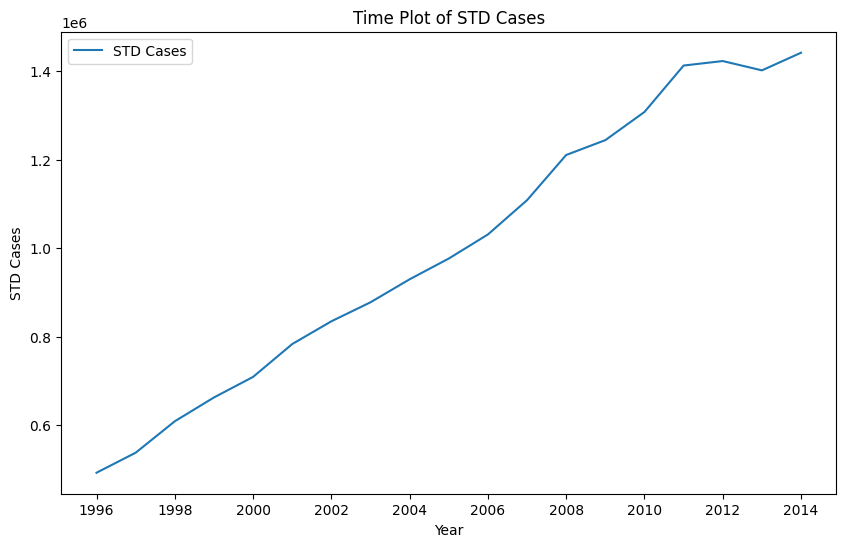

<Figure size 1000x600 with 0 Axes>

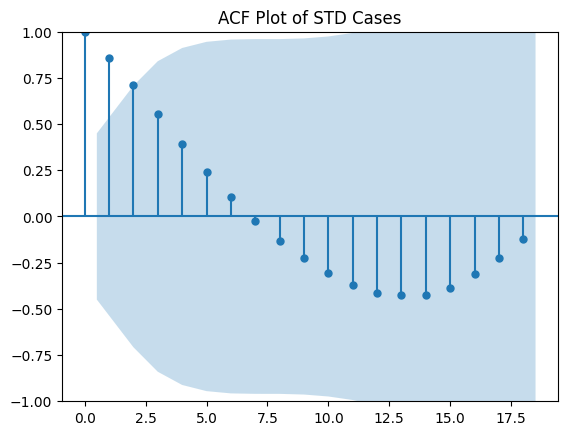

In [187]:
# Time plot
plt.figure(figsize=(10, 6))
plt.plot(df2.index, df2['STD Cases'], label='STD Cases')
plt.xlabel('Year')
plt.ylabel('STD Cases')
plt.title('Time Plot of STD Cases')
plt.legend()
plt.show()

# ACF plot
plt.figure(figsize=(10, 6))
plot_acf(df2['STD Cases'], lags=18)
plt.title('ACF Plot of STD Cases')
plt.show()


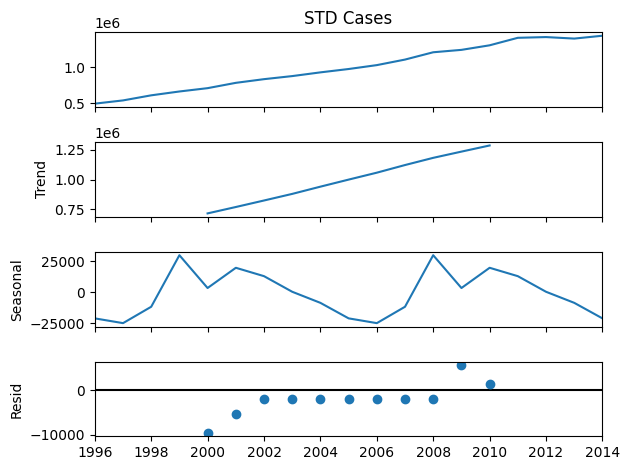

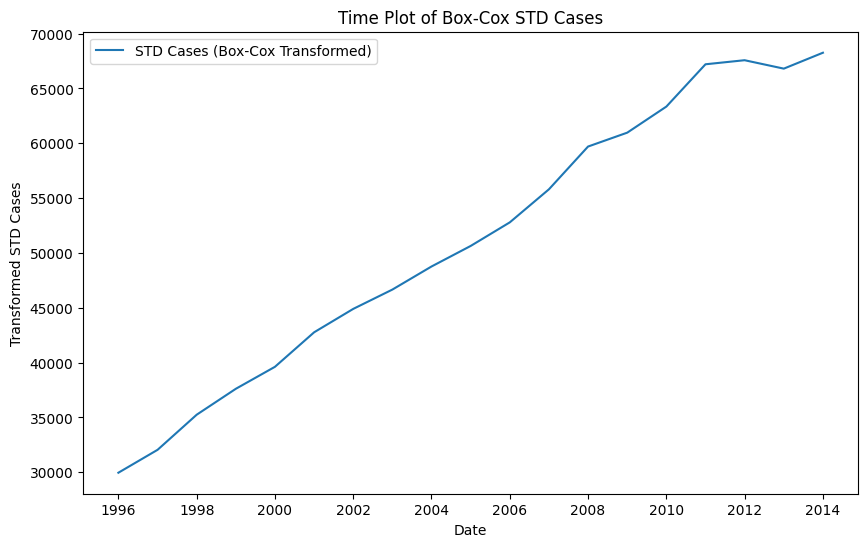

In [193]:
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats

# Decomposition
decomposition = seasonal_decompose(df2['STD Cases'], model='additive', period=9)
decomposition.plot()
plt.show()

# Box-Cox transformation
df2['STD Cases_boxcox'], lam = stats.boxcox(df2['STD Cases'])
plt.figure(figsize=(10, 6))
plt.plot(df2.index, df2['STD Cases_boxcox'], label='STD Cases (Box-Cox Transformed)')
plt.xlabel('Date')
plt.ylabel('Transformed STD Cases')
plt.title('Time Plot of Box-Cox STD Cases')
plt.legend()
plt.show()


c:\Users\Kofo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Kofo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Kofo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Kofo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Kofo\AppData\Local\Programs\Python\

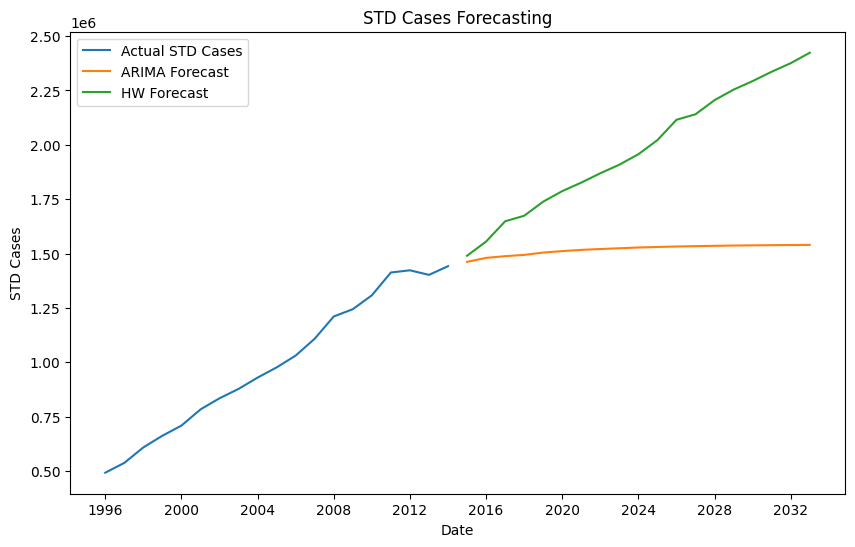

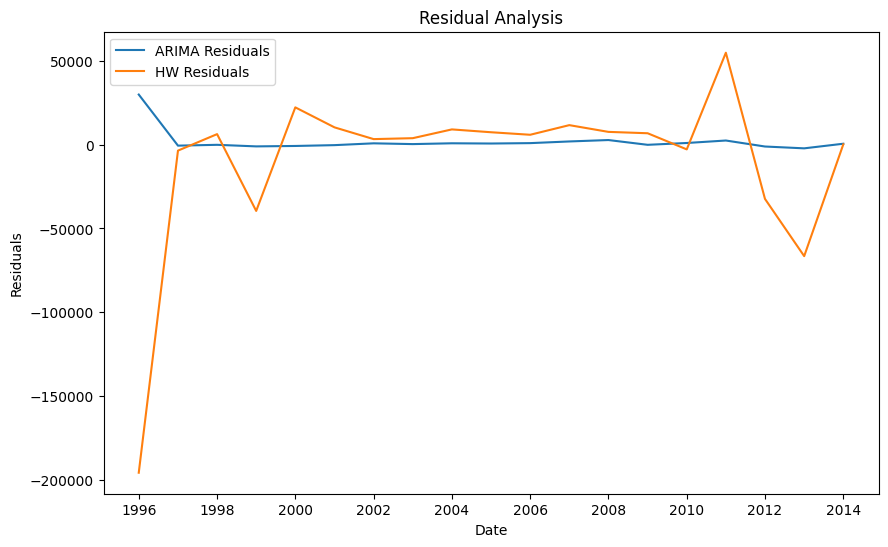

ARIMA RMSE: 594840.4582908704
HW RMSE: 981159.7601659484


In [198]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# ARIMA model
arima_model = ARIMA(df2['STD Cases_boxcox'], order=(5,1,0))
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=19)
arima_forecast = (arima_forecast * lam + 1)**(1/lam)

# Exponential Smoothing model
hw_model = ExponentialSmoothing(df2['STD Cases'], trend='additive', seasonal='additive', seasonal_periods=9)
hw_result = hw_model.fit()
hw_forecast = hw_result.forecast(steps=19)

# Plot forecasts
plt.figure(figsize=(10, 6))
plt.plot(df2.index, df2['STD Cases'], label='Actual STD Cases')
plt.plot(arima_forecast.index, arima_forecast, label='ARIMA Forecast')
plt.plot(hw_forecast.index, hw_forecast, label='HW Forecast')
plt.xlabel('Date')
plt.ylabel('STD Cases')
plt.title('STD Cases Forecasting')
plt.legend()
plt.show()

# Residual analysis
plt.figure(figsize=(10, 6))
plt.plot(arima_result.resid, label='ARIMA Residuals')
plt.plot(hw_result.resid, label='HW Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.legend()
plt.show()

# Model accuracy
arima_rmse = mean_squared_error(df2['STD Cases'][-19:], arima_forecast, squared=False)
hw_rmse = mean_squared_error(df2['STD Cases'][-19:], hw_forecast, squared=False)
print(f'ARIMA RMSE: {arima_rmse}')
print(f'HW RMSE: {hw_rmse}')
